In [1]:
import pandas
import seaborn
import matplotlib

import sklearn.neighbors
import sklearn.feature_selection

%matplotlib inline

# Instructions

- Read the data from CSV files and properly set the indices


In [2]:
data_train = pandas.read_csv('../data/swiss_roll.train.csv').set_index('id')
data_train

feature_1  feature_2  feature_3  label
id                                         
253  20.247690   3.510226 -10.899525      1
667   7.855569  14.636874  -0.812650      1
85   10.934220   9.997596   0.876846      1
969  12.332401   2.426448   7.210901      1
75    3.453681  -2.443097  -3.627336      0
..         ...        ...        ...    ...
835  -2.712459   9.219751  -6.060371      0
192   8.389786   1.642508   1.553796      1
629  15.253304   6.905200  -4.886124      1
559  20.891672  11.768400   1.729032      1
684   7.402823  -0.841563  -1.951443      0

[750 rows x 4 columns]

In [3]:
data_test = pandas.read_csv('../data/swiss_roll.test.csv').set_index('id')
data_test

feature_1  feature_2  feature_3  label
id                                         
993   1.981411  12.369014 -11.199469      0
859  -0.620656   7.692541   3.714898      0
298  14.535819  20.280348   2.769000      1
553  -1.204748   8.361636  -9.838214      0
672   1.279290  -0.175060 -11.983523      0
..         ...        ...        ...    ...
462   2.975667  12.322416   0.002500      1
356   3.031101   3.553869   5.881484      1
2     3.144801   3.231929 -13.694254      0
478   8.522862  18.170372   4.437525      1
695   6.718959  15.239360  -1.690276      1

[250 rows x 4 columns]

# Instructions

- Use the following code snippet to visualize both features and labels on both data sets

```
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data['feature_1'],
    data['feature_2'],
    data['feature_3'],
    c = data['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)
```


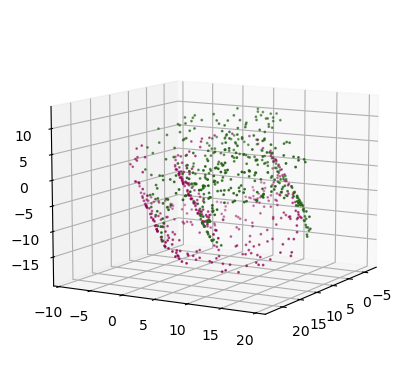

In [4]:
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data_train['feature_1'],
    data_train['feature_2'],
    data_train['feature_3'],
    c = data_train['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)

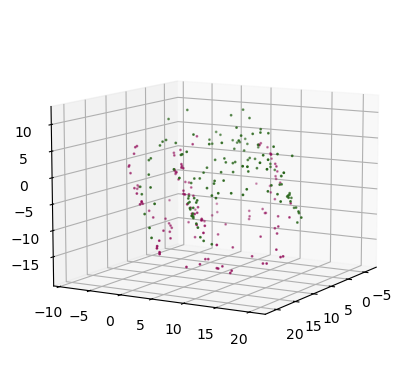

In [5]:
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data_test['feature_1'],
    data_test['feature_2'],
    data_test['feature_3'],
    c = data_test['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)

# Instructions

- Investigate the training data by selecting two features out of these three features
- Then, use the following code snippet to visualize both features and labels
- Discuss the potential decision boundary if the model is trained using only the selected features

```
x_axis = 'feature_1'
y_axis = 'feature_2'
seaborn.scatterplot(
    data = data_train[[x_axis, y_axis, 'label']],
    x = x_axis,
    y = y_axis,
    hue = 'label',
)
```


<Axes: xlabel='feature_1', ylabel='feature_2'>

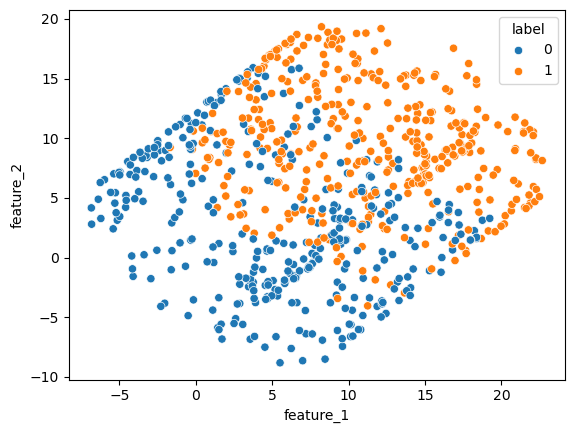

In [6]:
x_axis = 'feature_1'
y_axis = 'feature_2'
seaborn.scatterplot(
    data = data_train[[x_axis, y_axis, 'label']],
    x = x_axis,
    y = y_axis,
    hue = 'label',
)

# Instruction

- Define a `sklearn.neighbors.KNeighborsClassifier` model with the following configurations to be used as an estimator
```
        n_neighbors = 5,
        weights     = 'uniform', 
        p           = 2, 
```
    
- Use `sklearn.feature_selection.SequentialFeatureSelector` with the following configurations for automatic feature selection

```
        estimator            = model,
        n_features_to_select = 2,
        direction            = 'backward'

```

- Now, fit the feature selector to the training data


In [7]:
model = sklearn.neighbors.KNeighborsClassifier(
    n_neighbors = 5,
    weights     = 'uniform', 
    p           = 2, 
)
model

KNeighborsClassifier()

In [10]:
feature_selector = sklearn.feature_selection.SequentialFeatureSelector(
    estimator            = model,
    n_features_to_select = 2,
    direction            = 'backward'
)
feature_selector

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(),
                          n_features_to_select=2)

In [11]:
feature_selector.fit(
    X = data_train.drop(['label'], axis= 'columns'),
    y=data_train['label'],
)

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(),
                          n_features_to_select=2)

# Instruction
- Use `.get_feature_names_out()` to get the optimal subset of features from the feature selector
- Create `pandas.DataFrame`s that contain only those selected features for training data and test data respectively 

In [12]:
selected_features = feature_selector.get_feature_names_out().tolist()
selected_features

['feature_2', 'feature_3']

In [13]:
data_train_feature_selected = data_train[selected_features + ['label']]

In [14]:
data_test_feature_selected = data_test[selected_features + ['label']]

# Instruction

- Plot `seaborn.scatterplot` using the selected features with `label` as `hue`

<Axes: xlabel='feature_2', ylabel='feature_3'>

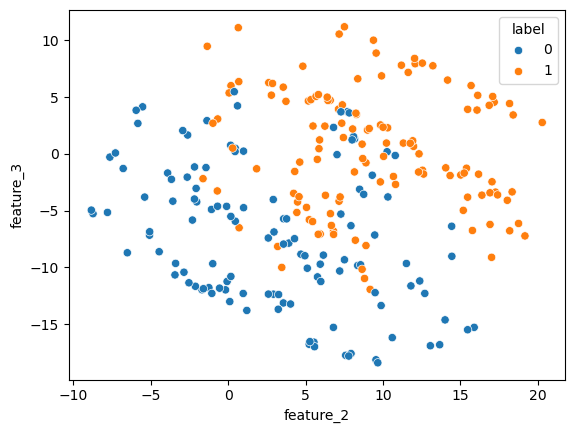

In [20]:
seaborn.scatterplot(
    data = data_test_feature_selected,
    x = 'feature_2',
    y = 'feature_3',
    hue = 'label',
)

# Instructions

- Simply write the train data set to `./data/features.train.csv`
- Simply write the test data set to `./data/features.test.csv`


In [16]:
data_train_feature_selected.to_csv('./data/features.train.csv')

In [17]:
data_test_feature_selected.to_csv('./data/features.test.csv')